## 구글 드라이브와 연결

In [3]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Colab에서의 폰트 설정

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정

!apt install fonts-nanum # 나눔 폰트 설치
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')
# 인식이 잘 안 되었을 가능성이 높으므로“런타임 > 런타임 다시 시작” 수행 후 여기부터 다시 진행한다

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


## 형태소분석기 설치

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

## 데이터 로딩

In [8]:
# 읽기 함수 정의
def read_data(filename, encoding='utf8'):
    with open(filename, 'r', encoding=encoding) as f:
        data = f.read()
    return data

In [9]:
kim_data = read_data('/content/gdrive/MyDrive/pytest/김소월시.txt')

In [10]:
yeon_data = read_data('/content/gdrive/MyDrive/pytest/윤동주시.txt')

## 데이터 확인

In [11]:
print(len(kim_data))
print(len(yeon_data))
print([kim_data[i] for i in range(10)])
print([yeon_data[i] for i in range(10)])

3814
1531
['못', ' ', '잊', '어', '\n', '\n', ' ', ' ', ' ', ' ']
['1', '.', ' ', '내', '일', '은', ' ', '없', '다', '\n']


## 한글과 띄어쓰기를 제외한 문자 제거

In [12]:
import re
def hangul_T(data):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
    result = hangul.sub('', data) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return result

## 공백 제거

In [13]:
kim_data = kim_data.replace('\n',' ')
kim_data = kim_data.replace('\t',' ')
kim_data = kim_data.replace('     ', '')

## 데이터 형태소 분석

In [14]:
import rhinoMorph
rn = rhinoMorph.startRhino()

morphed_data = rhinoMorph.onlyMorph_list(rn, kim_data, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
morphed_data = ' '.join([str(elem) for elem in morphed_data])
morphed_data

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


'못 잊다 김소월 못 잊다 생각 그런대로 한세상 지내다 사노 잊히다 날 있다 못 잊다 생각 그런대로 세월 가다 라 못 잊다 잊히다 그러나 또 한끝 이렇다 그립다 살뜰히 못 잊다 어쩌면 생각 뜨다 지나다 삭주 구성 물 사흘 배 사흘 멀다 삼천리 더더구나 걷다 넘다 멀다 삼천리 삭주 구성 살다 넘다 요 물 맞다 함빡 히 젖다 제비 가다 비 걸리다 오노 저녁 높다 살다 밤 높다 살다 삭주 구성 살다 넘다 멀다 가끔가끔 꿈 다 오다 돌아오다 길이 서로 떠나다 몸 몸 그립다 둔 곳 곳 그립다 못 새들 집 그립다 남북 하다 들다 끝 날아가다 날다 구름 밤 바로 가 텐 삭주 구성 살다 넘다 멀다 접동새 접동 접동 아우 비다 접동 진두 강 가람 살다 누나 진두 강 앞마을 오다 울다 옛날 나라 멀다 뒤쪽 진두 강 가람 살다 누나 의붓어미 시샘 죽다 누나 부르다 오오 불다 섧다 시새움 몸 죽다 누나 죽다 접동새 되다 남다 되다 랩 동생 죽다 못 잊다 차마 못 잊다 야삼경 남 다 밤 깊다 이 살다 저 살다 옮아가다 슬피 울다 멀다 후일 멀다 훗날 찾다 그때 말 잊다 속 나무라다 무척 그리다 잊다 그래도 나무라다 믿기다 잊다 오늘 어제 잊다 멀다 훗날 그때 잊다 살다 살다 새다 오리나무 위 울다 살다 새다 왜 우노 시 메다 살다 골 영 넘다 그래서 울다 눈 내리다 오다 덮이다 오늘 하룻길 돌아서다 가다 하다 불귀 불귀 다시 불귀 삼수갑산 다시 불귀 사나이 속이다 잊다 년 정분 못 잊다 산 오다 눈 물 녹다 눈 살다 새다 오리나무 위 울다 삼수갑산 가다 길 고개 길 예전 미처 모르다 요 보다 가을 없이 밤 돋다 달 예전 미처 모르다 이렇게 사무치다 그립다 예전 미처 모르다 달이다 암만 밝다 쳐다보다 예전 미처 모르다 이제 금 저 달이다 설움 예전 미처 모르다 원앙 치다 바드득 이 갈고다 죽다 창 아롱아롱 달이다 비치다 눈물 새우잠 팔굽 베개 보다 꿩 잠 없다 밤 와 울다 동달이 베개 가다 베갯머리 죽다 사다 언약 하다 봄 메 멧 기슭 울다 접동 사랑 사랑 조히 울 동달이 베개 가다 

## 결과 출력

In [15]:
from collections import Counter

mergedTextList = morphed_data.split(' ')
while '' in mergedTextList:
    mergedTextList.remove('')
print('김소월 단어빈도 총합:', len(mergedTextList))

print('김소월 고빈도 단어:', mergedTextList)
wordInfo = Counter(mergedTextList)

sorted_values = []
for i in wordInfo.values():
    sorted_values_ = round(int(i)/len(mergedTextList)*100,2)
    sorted_values.append(sorted_values_)

sorted_values = sorted(sorted_values,reverse=True)

wordInfo = Counter(mergedTextList)
print('김소월 고빈도 단어비율:', sorted_values)

김소월 단어빈도 총합: 730
김소월 고빈도 단어: ['못', '잊다', '김소월', '못', '잊다', '생각', '그런대로', '한세상', '지내다', '사노', '잊히다', '날', '있다', '못', '잊다', '생각', '그런대로', '세월', '가다', '라', '못', '잊다', '잊히다', '그러나', '또', '한끝', '이렇다', '그립다', '살뜰히', '못', '잊다', '어쩌면', '생각', '뜨다', '지나다', '삭주', '구성', '물', '사흘', '배', '사흘', '멀다', '삼천리', '더더구나', '걷다', '넘다', '멀다', '삼천리', '삭주', '구성', '살다', '넘다', '요', '물', '맞다', '함빡', '히', '젖다', '제비', '가다', '비', '걸리다', '오노', '저녁', '높다', '살다', '밤', '높다', '살다', '삭주', '구성', '살다', '넘다', '멀다', '가끔가끔', '꿈', '다', '오다', '돌아오다', '길이', '서로', '떠나다', '몸', '몸', '그립다', '둔', '곳', '곳', '그립다', '못', '새들', '집', '그립다', '남북', '하다', '들다', '끝', '날아가다', '날다', '구름', '밤', '바로', '가', '텐', '삭주', '구성', '살다', '넘다', '멀다', '접동새', '접동', '접동', '아우', '비다', '접동', '진두', '강', '가람', '살다', '누나', '진두', '강', '앞마을', '오다', '울다', '옛날', '나라', '멀다', '뒤쪽', '진두', '강', '가람', '살다', '누나', '의붓어미', '시샘', '죽다', '누나', '부르다', '오오', '불다', '섧다', '시새움', '몸', '죽다', '누나', '죽다', '접동새', '되다', '남다', '되다', '랩', '동생', '죽다', '못', '잊다', '차마', '못', '잊다', '야삼경', '남', '다

## 그래프 그리기

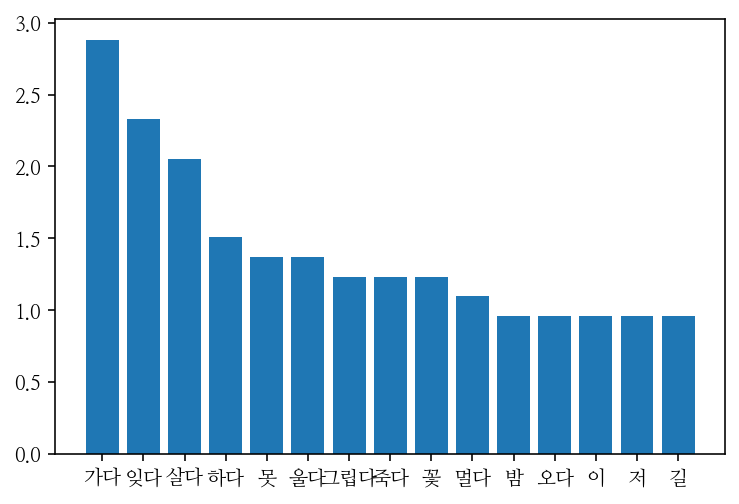

In [16]:
import matplotlib.pyplot as plt

sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)


plt.bar(range(15), sorted_values[:15])
plt.xticks(range(15), sorted_keys[:15])
plt.show()

## Word Cloud

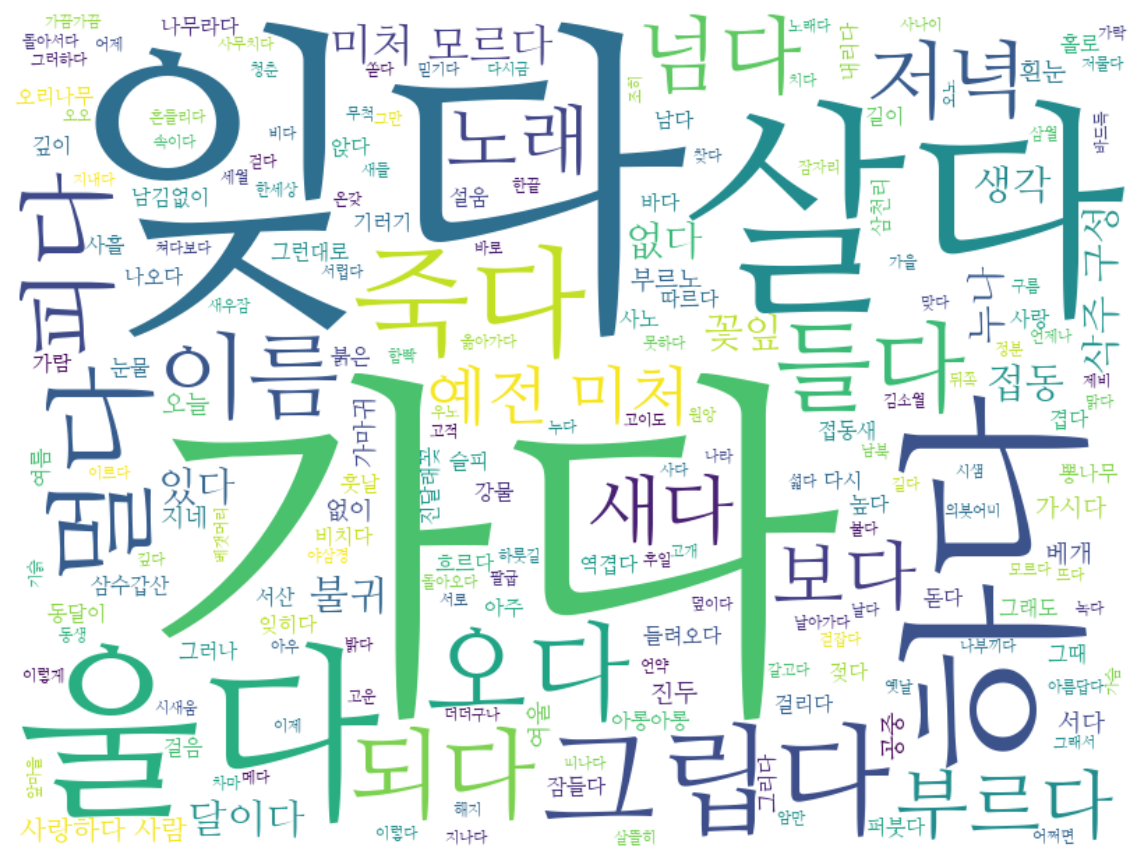

In [18]:
!pip install wordcloud
from wordcloud import WordCloud
cloud = WordCloud(font_path = fontpath, width=800, height = 600, background_color='white').generate(" ".join(mergedTextList))
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## mask 적용

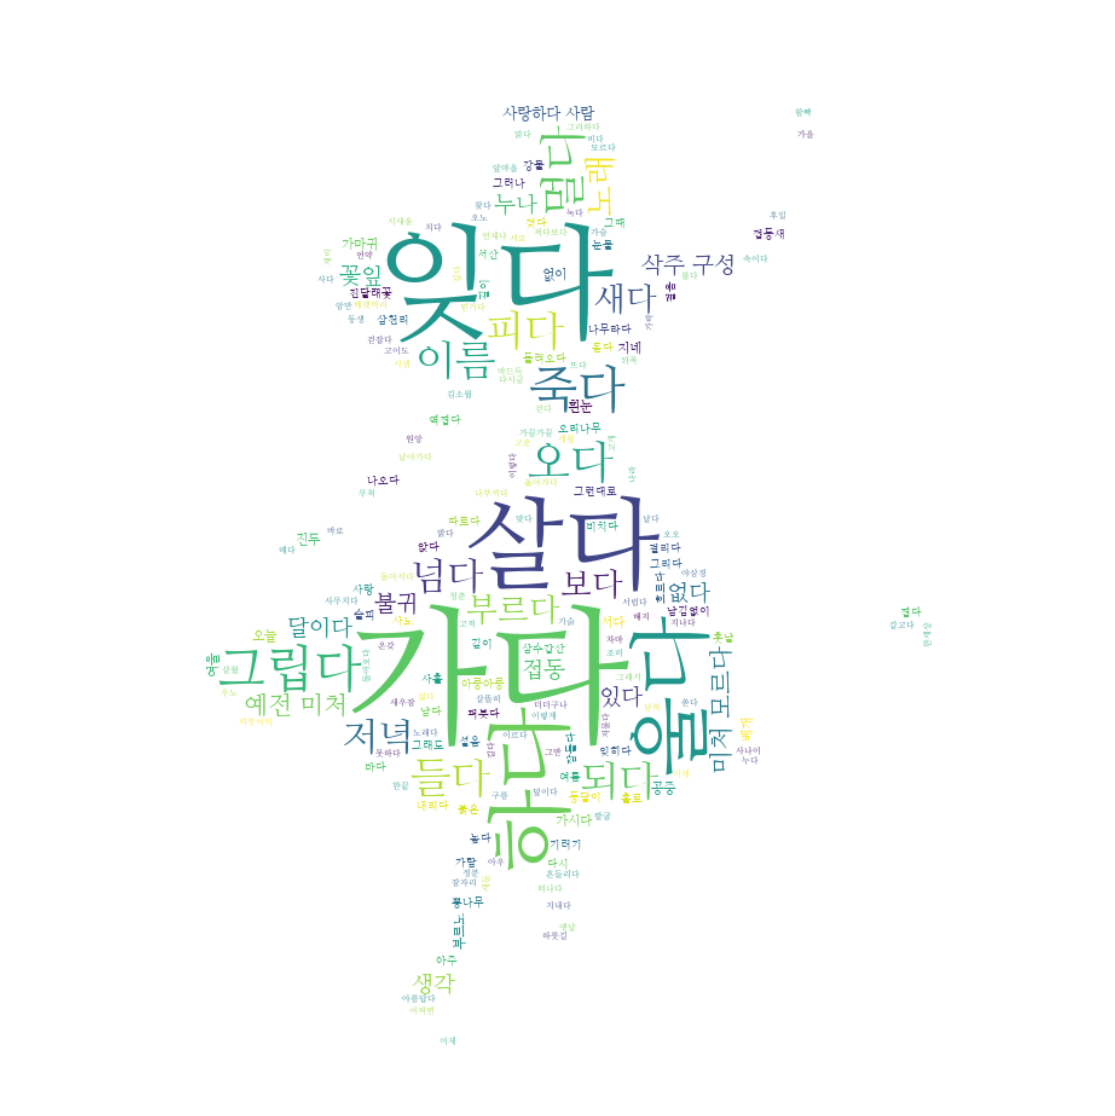

In [19]:
from PIL import Image
from os import path
import numpy as np
mask_path = '/content/gdrive/MyDrive/pytest'
#현재 경로 받기
#os.getcwd()
alice_mask = np.array(Image.open(path.join(mask_path,"alice.png")))
cloud = WordCloud(font_path=fontpath, width=800, 
                  height=600, background_color='white', 
                  mask=alice_mask).generate(" ".join(mergedTextList))
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
yeon_data = yeon_data.replace('\t',' ')
yeon_data = yeon_data.replace('\n',' ')
yeon_data

'1. 내일은 없다  내일 내일 하기에  물었더니  밤을 자고 동틀 때  내일이라고  새날을 찾던 나는  잠을 자고 돌보니  그때는 내일이 아니라  오늘이더라  동무여!  내일은 없나니……  2. 흰 그림자 황혼이 짙어지는 길모금에서  하루 종일 시든 귀를 가만히 기울이면  땅거미 옮겨지는 발자취 소리,  발자취 소리를 들을 수 있도록  나는 총명했던가요.  3. 별 헤는 밤 계절이 지나가는 하늘에는 가을로 가득 차 있습니다.  나는 아무 걱정도 없이  가을 속의 별들을 다 헤일 듯 합니다.  가슴 속에 하나 둘 새겨지는 별을 이제 다 못헤는 것은  쉬이 아침이 오는 까닭이요, 내일 밤이 남은 까닭이요,  아직 나의 청춘이 다 하지 않은 까닭입니다.  4. 쉽게 씌여진 시 창밖에 밤비가 속살거려  육첩방은 남의 나라,  시인이란 슬픈 천명인줄 알면서도  한줄 시를 적어 볼까.  5. 병원 나의 늙은 의사는 젊은이의 병을 모른다.  나한테는 병이 없다고 한다.  이 지나친 시련, 이 지나친 피로, 나는 성내서는 안 된다.  6. 새로운 길 내를 건너서 숲으로  고개를 넘어서 마을로  어제도 가고 오늘도 갈  나의 길 새로운 길  7. 아우의 인상화 붉은 이마에 싸늘한 달이 서리어  아우의 얼굴은 슬픈 그림이다.  발걸음을 멈추어  살그머니 앳된 손을 잡으며  "너는 자라 무엇이 되려니"  "사람이 되지"  아우의 설은 진정코 설은 대답이다.  8. 바람이 불어 바람이 어디로부터 불어와  어디로 불려가는 것일까.  바람이 부는데  내 괴로움에는 이유가 없다.  9. 참회록 파란 녹이 낀 구리거울 속에  내 얼굴이 남아있는 것은  어느 왕조의 유물이기에  이다지도 욕될까.  나는 나의 참회의 글을 한줄에 줄이자.  -만 24년 1개월을  무슨 기쁨을 바라 살아왔든가.  내일이나 모레나 그 어느 즐거운 날에  나는 또 한 줄의 참회록을 써야 한다.  10. 봄 극 중 윤동주(강하늘)가 도쿄 릿교대학 영문학 수업을 듣다 써 내려간 시로 등장한다.  봄이 혈관 속에 시내

In [22]:
import rhinoMorph
rn = rhinoMorph.startRhino()


morphed_data = rhinoMorph.onlyMorph_list(rn, yeon_data, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)

morphed_data = ' '.join([str(elem) for elem in morphed_data])
morphed_data

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


'내일 없다 내일 내일 하다 묻다 밤 동트다 때 내일 새날 찾다 잠 돌보다 그때 내일 오늘 동무 내일 없다 희다 그림자 황혼 짙다 길 모금 하루 종일 시들다 귀 가만히 기울이다 땅거미 옮기다 발자취 소리 발자취 소리 듣다 있다 총명 별 헤다 밤 계절 지나가다 하늘 가을 가득 차 아무 걱정 없이 가을 속의 별 다 헤이다 하다 가슴 속 새기다 이제 다 못 헤다 쉬이 아침 오다 까닭 내일 밤 남다 까닭 아직 청춘 다 하다 까닭 쉽다 씌다 여진 시 창밖 밤비 속살거리다 육첩방 남 나라 시인 슬프다 천명인 알다 하다 적다 병원 늙다 의사 젊은이 병 모르다 병 없다 이 지나치다 시련 이 지나치다 피로 성내다 서다 안 되다 새롭다 길 내 건너서다 숲 고개 넘다 마을 어제 가다 오늘 가다 길 새롭다 길 아우 인상화 붉은 이마 싸늘 달이다 서리다 아우 얼굴 슬프다 그림 발걸음 멈추다 살그머니 앳되다 손 잡다 자다 되려 사람 되다 아우 진정코 대답 바람 불다 바람 불어오다 불리다 바람 부 괴로움 이유 없다 참회록 파란 녹이다 끼이다 구리거울 속 얼굴 남다 어느 왕조 유물 이다지 욕 되다 참회 글 하다 주다 줄이다 만 무슨 기쁨 바라다 살아오다 내일 모레 그 어느 즐겁다 날 또 하다 참회록 쓰다 봄 극 윤동주 강하다 늘다 도쿄 릿교 대학 영문학 수업 듣다 써 내려가다 시 등장 봄 혈관 속 시내 흐르다 돌 돌 시내 가차 울다 언덕 개나리 진달래 노랗다 배추 꽃 동 참다 풀포기 피어나다 즐겁다 종달새 어느 이랑 즐거웁다 솟다 푸르르다 하늘 높다 한데 사랑 추억 기차다 아무 새롭다 소식 없이 멀리 싣다 주다 봄 다 가다 동경 교외 어느 조용 하숙방 옛 거리 남다 희망 사랑 그립다 오늘 기차다 무의미 하다 지나가다 오늘 날다 기다리다 정거장 가깝다 언덕 서성거리다 아아 젊음 오래 남다 공상 말없이 이 탑 쌓다 있다 명예 허영 천공 무너지다 모르다 하다 층 두 층 높이 쌓다 자화상 한 사나이 어쩐지 그 사나이 밉다 돌아가다 돌아가다 생각 그 사나이 가엾다 도로 가 들여다보다 사나이 그대로

In [23]:
from collections import Counter

mergedTextList = morphed_data.split(' ')
while '' in mergedTextList:
    mergedTextList.remove('')
print('윤동주 단어빈도 총합:', len(mergedTextList))

print('윤동주 고빈도 단어:', mergedTextList)

sorted_values = []
for i in wordInfo.values():
    sorted_values_ = round(int(i)/len(mergedTextList)*100,2)
    sorted_values.append(sorted_values_)
sorted_values = sorted(sorted_values,reverse=True)

wordInfo = Counter(mergedTextList)
print('윤동주 고빈도 단어비율:', sorted_values)

윤동주 단어빈도 총합: 326
윤동주 고빈도 단어: ['내일', '없다', '내일', '내일', '하다', '묻다', '밤', '동트다', '때', '내일', '새날', '찾다', '잠', '돌보다', '그때', '내일', '오늘', '동무', '내일', '없다', '희다', '그림자', '황혼', '짙다', '길', '모금', '하루', '종일', '시들다', '귀', '가만히', '기울이다', '땅거미', '옮기다', '발자취', '소리', '발자취', '소리', '듣다', '있다', '총명', '별', '헤다', '밤', '계절', '지나가다', '하늘', '가을', '가득', '차', '아무', '걱정', '없이', '가을', '속의', '별', '다', '헤이다', '하다', '가슴', '속', '새기다', '이제', '다', '못', '헤다', '쉬이', '아침', '오다', '까닭', '내일', '밤', '남다', '까닭', '아직', '청춘', '다', '하다', '까닭', '쉽다', '씌다', '여진', '시', '창밖', '밤비', '속살거리다', '육첩방', '남', '나라', '시인', '슬프다', '천명인', '알다', '하다', '적다', '병원', '늙다', '의사', '젊은이', '병', '모르다', '병', '없다', '이', '지나치다', '시련', '이', '지나치다', '피로', '성내다', '서다', '안', '되다', '새롭다', '길', '내', '건너서다', '숲', '고개', '넘다', '마을', '어제', '가다', '오늘', '가다', '길', '새롭다', '길', '아우', '인상화', '붉은', '이마', '싸늘', '달이다', '서리다', '아우', '얼굴', '슬프다', '그림', '발걸음', '멈추다', '살그머니', '앳되다', '손', '잡다', '자다', '되려', '사람', '되다', '아우', '진정코', '대답', '바람', '불다', '바람', '불어오다', '불리다', '바람', '부', 

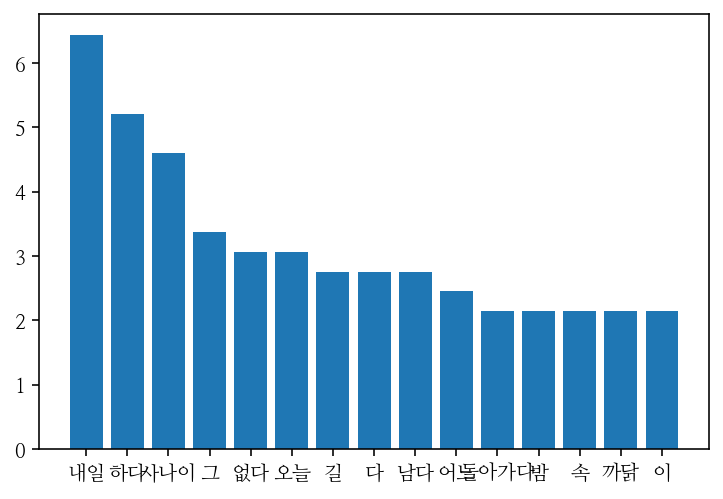

In [24]:
import matplotlib.pyplot as plt

sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

plt.bar(range(15), sorted_values[:15])
plt.xticks(range(15), sorted_keys[:15])
plt.show()

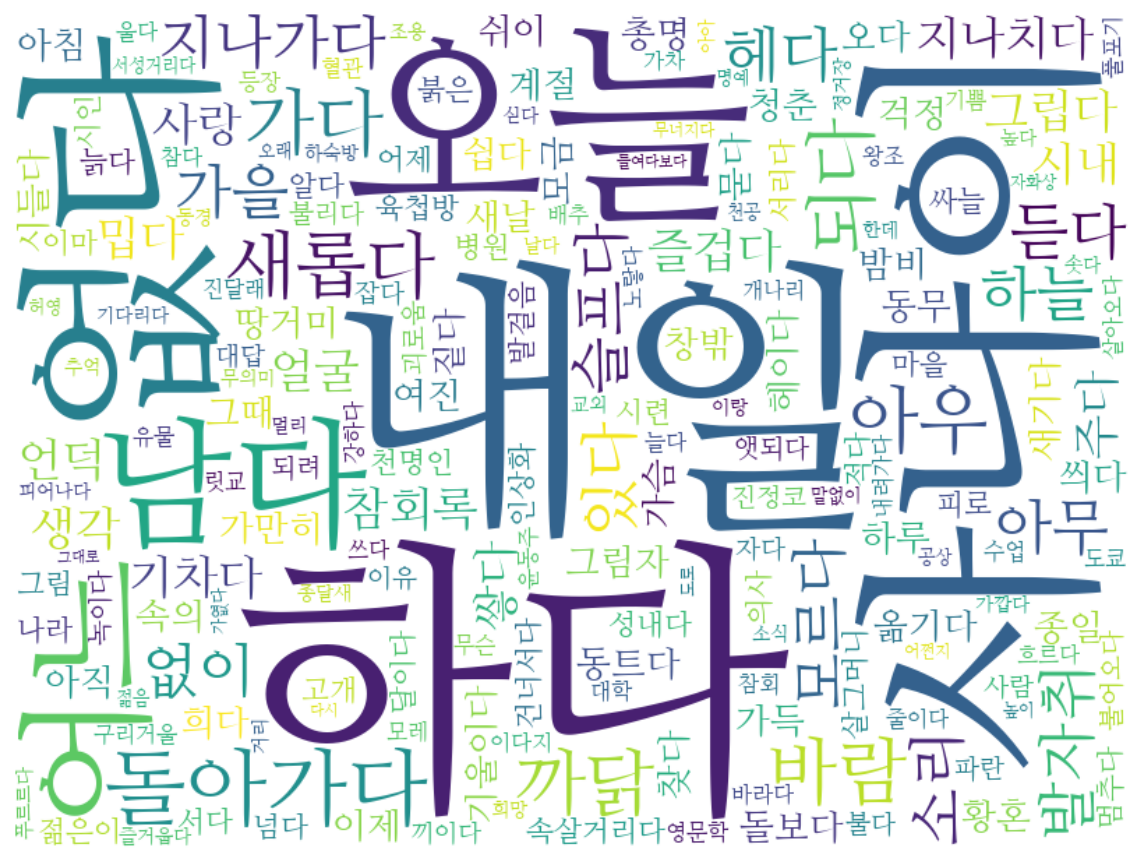

In [25]:
cloud = WordCloud(font_path = fontpath, width=800, height = 600, background_color='white').generate(" ".join(mergedTextList))
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()